In [37]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../..")
from utils.loadmanager import LoadManager

In [38]:
data_path_1 = "/Users/hayden/Desktop/fireball_onlineTF/example_data/data/HRM3.DigiCam_OD1_1714604587992043_1714604581335000.csv"
data_path_2 = "/Users/hayden/Desktop/fireball_onlineTF/example_data/data/HRM3.DigiCam_OD2_1684845285167029_1684845278535000.csv"

In [39]:
def _load_digicam_image(path:str):
        """Loads image object from .csv given by DigiCam. Due to the way that the DigiCams store image data,
        the first column and first row have to be removed, as these contain coordinate information about the
        pixels.
        
        Parameters
        ----------
            path : str
                The path to the raw .csv file where the DigiCam image is stored.
        
        Returns
        -------
            img : np.ndarray
                The image as a numpy array after being loaded from the .csv, and after having its first column and
                first row trimmed.
            x_pixels : np.ndarray
                The trimmed top row of the image data, which encodes the x coordinates in mm.
            y_pixels : np.ndarray
                The trimmed first column of the image data, which encodes the y coordinates in mm.
        """
        
        #Remove top row and first column, as this is coordinate data
        img = np.genfromtxt(path, delimiter=',')
        x_coords = img[0, 1:]
        y_coords = img[1:, 0]
        img = img[1:, 1:]
        
        return img, x_coords, y_coords

In [40]:
# LOAD TWO IMAGES
img1, x1, y1 = _load_digicam_image(path=data_path_1)
img2, x2, y2 = _load_digicam_image(path=data_path_2)

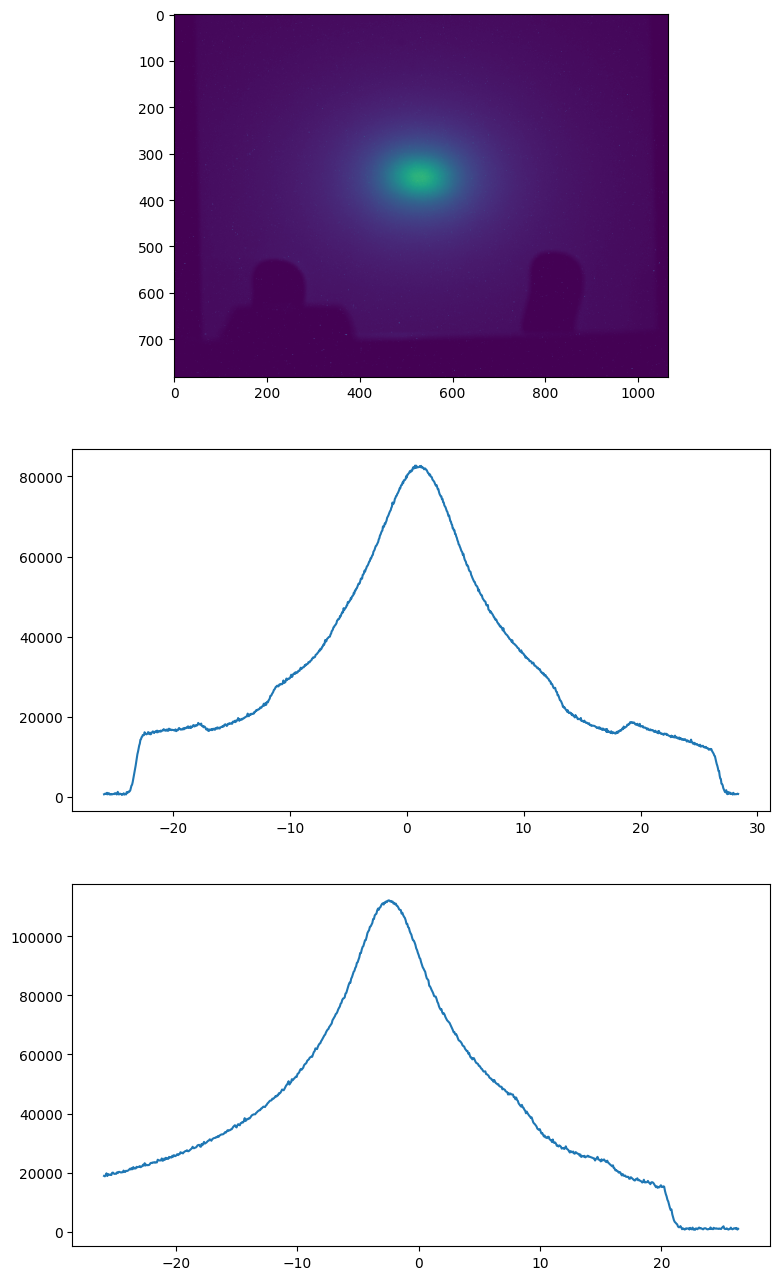

In [44]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9,16))

axs[0].imshow(img1)
axs[1].plot(x1, np.sum(img1, axis=0), label="X marginal")
axs[2].plot(y1[::-1], np.sum(img1, axis=1), label="Y marginal")
plt.show()

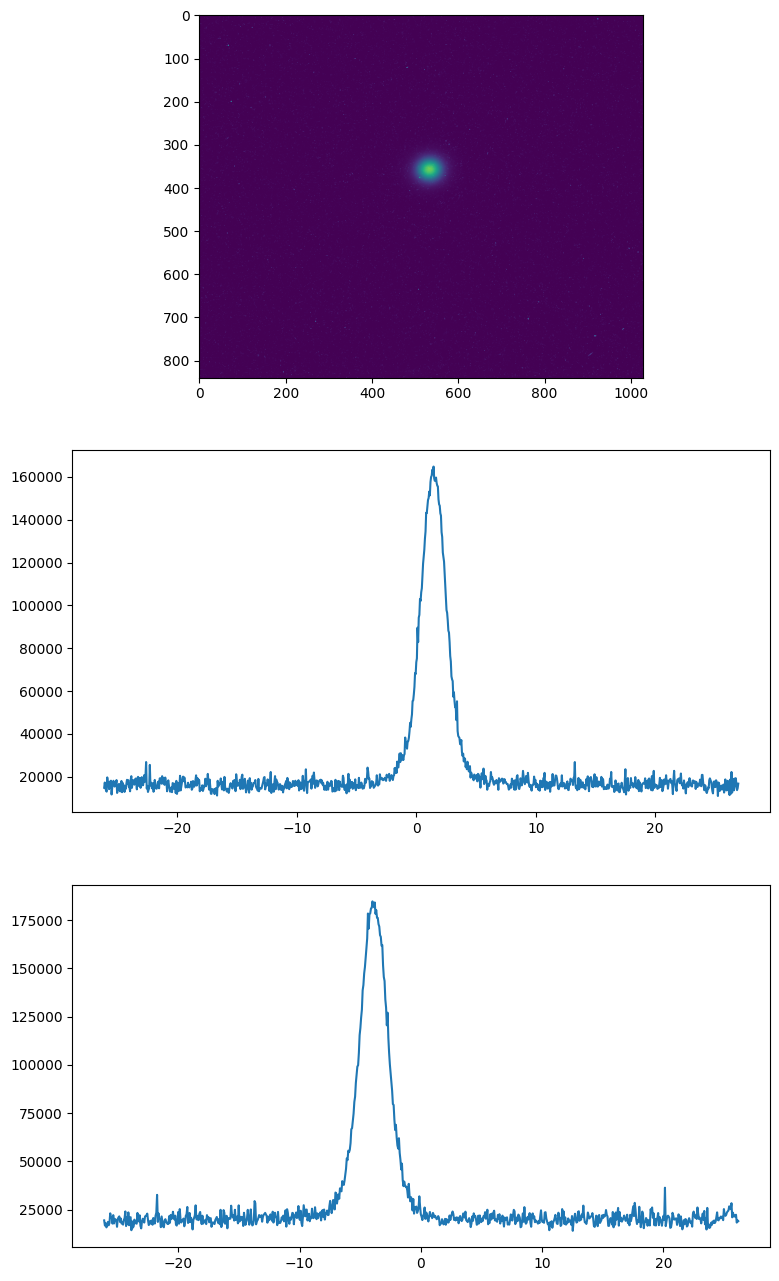

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9,16))

axs[0].imshow(img2)
axs[1].plot(x2, np.sum(img2, axis=0), label="X marginal")
axs[2].plot(y2[::-1], np.sum(img2, axis=1), label="Y marginal")
plt.show()